# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [99]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [100]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from plotnine import * 
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive

%matplotlib inline

In [101]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



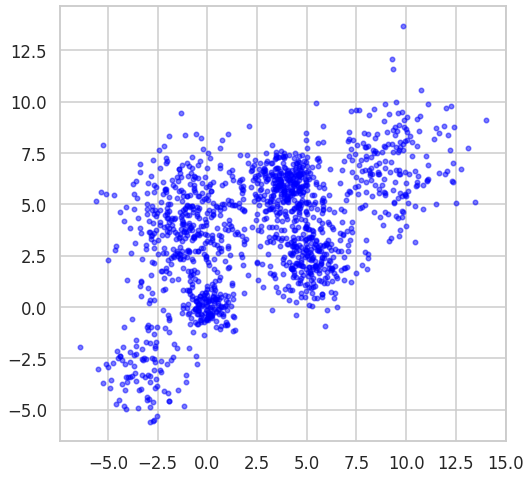

In [102]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [103]:
def kmeans_clustering(data, max_k):
    distortions = []
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        if k > 2:
            score = silhouette_score(data, kmeans.labels_)
            silhouette_scores.append(score)
        
        # plot cluster assignments for this k
        plt.figure(figsize=(8, 4))
        plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
        plt.title(f'KMeans Clustering (K={k})')
        plt.show()

    # plot distortion vs. K
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_k+1), distortions, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Distortion')
    plt.title('KMeans clustering Distortion')
    plt.show()

    # plot silhouette score vs. K
    plt.figure(figsize=(8, 4))
    plt.plot(range(3, max_k+1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('KMeans Clustering Silhouette Score')
    plt.show()

    # choose best K based on silhouette score
    best_k = np.argmax(silhouette_scores) + 3
    print(f'Best K based on Silhouette Score: {best_k}')
    
    # display the resulting clusters for this k
    display_cluster(data, km=kmeans, num_clusters=best_k)
    plt.title(f"KMeans Clustering (K: {best_k})")
    plt.show()


    return best_k, silhouette_scores[best_k-3]


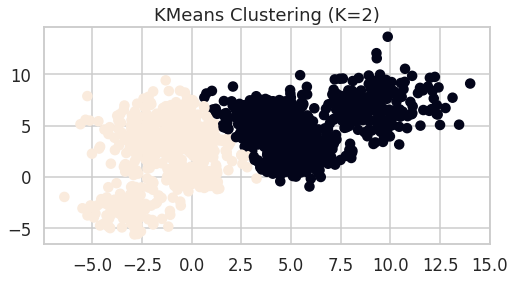

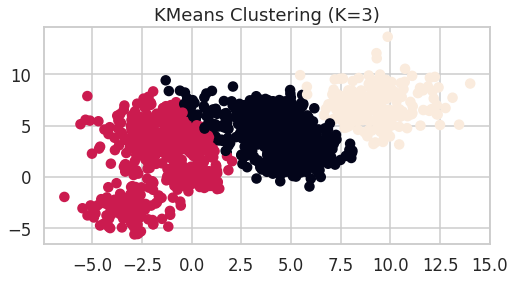

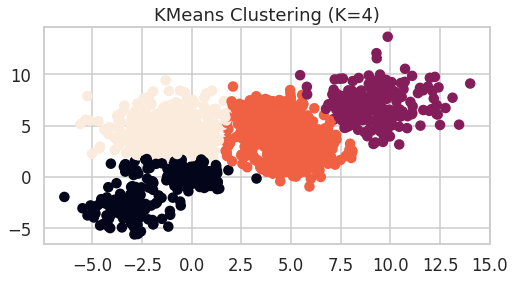

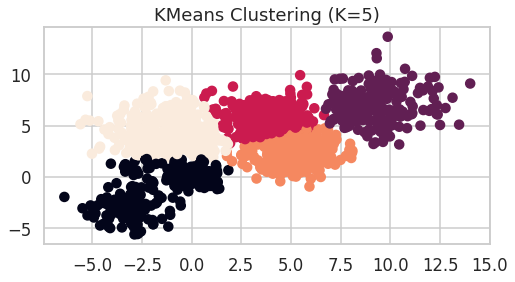

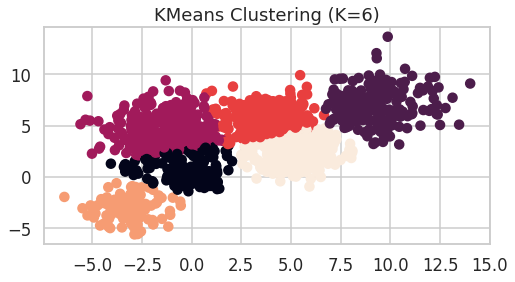

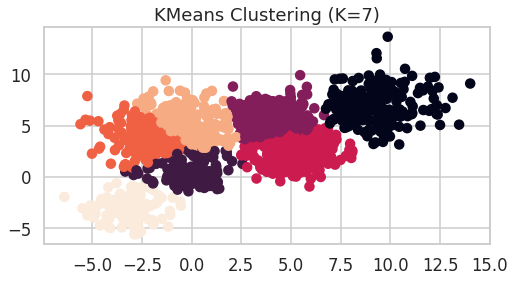

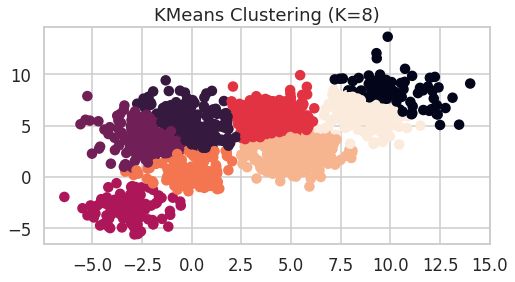

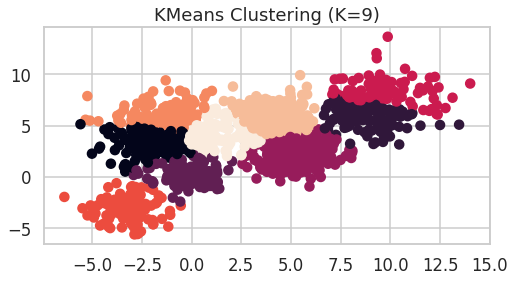

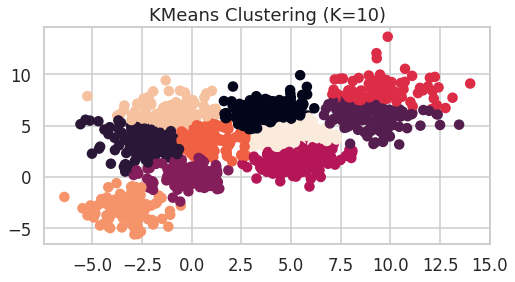

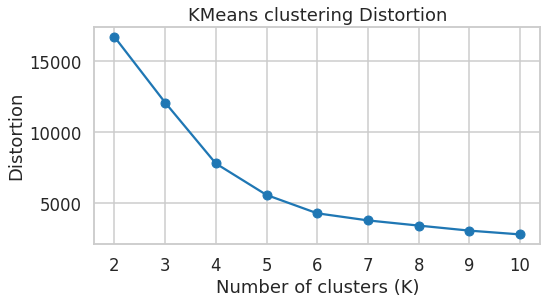

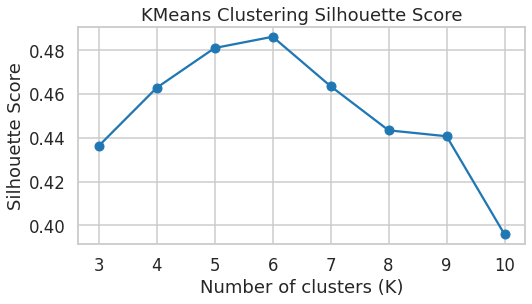

Best K based on Silhouette Score: 6


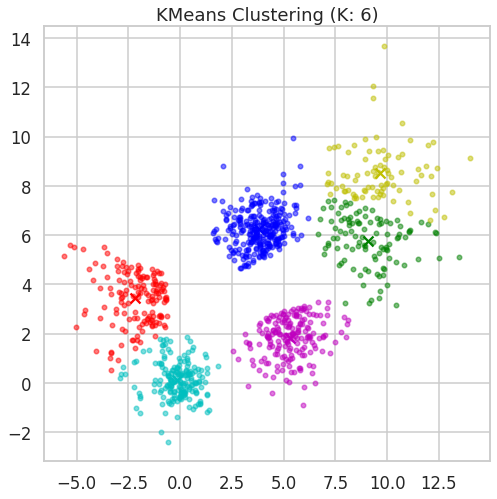

(6, 0.48614459735646176)

In [104]:
kmeans_clustering(Multi_blob_Data, 10)


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [105]:
def agglomerative_clustering(X):
    # Define the parameters to be tested
    affinities = ['euclidean', 'manhattan', 'cosine']
    linkage_methods = ['average', 'single']
    distance_thresholds = [1, 1.5, 2, 2.5, 3, 3.5]

    # Store the best silhouette score and its corresponding parameters
    best_score = -1
    best_affinity = None
    best_linkage = None
    best_distance_threshold = None
    best_labels = None

    # Loop through all combinations of parameters
    for affinity in affinities:
        for linkage_method in linkage_methods:
            for distance_threshold in distance_thresholds:
                # Perform hierarchical clustering
                model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_method, distance_threshold=distance_threshold)
                labels = model.fit_predict(X)

                # Calculate the silhouette score
                if len(np.unique(labels)) > 1:
                   score = silhouette_score(X, labels)
                else:
                  score = -1 #set a low score for invalid cases

                # Update the best score and its corresponding parameters
                if score > best_score:
                    best_score = score
                    best_affinity = affinity
                    best_linkage = linkage_method
                    best_distance_threshold = distance_threshold
                    best_labels = labels

    # Plot the dendrogram
    plt.figure(figsize=(12, 6))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Data point')
    plt.ylabel('Distance')
    linkage_matrix = linkage(X, method=best_linkage, metric=best_affinity)
    dendrogram(linkage_matrix)
    plt.axhline(y=best_distance_threshold, color='r', linestyle='--')
    plt.show()

    # Display the resulting clusters
    display_cluster(X, model)
    plt.title(f"Agglomerative Clustering (Affinity: {best_affinity}, Linkage: {best_linkage}, Distance threshold: {best_distance_threshold})")
    plt.show()

    # Print the best silhouette score and its corresponding parameters
    print(f"Best Silhouette score: {best_score}")
    print(f"Best Affinity: {best_affinity}")
    print(f"Best Linkage: {best_linkage}")
    print(f"Best Distance threshold: {best_distance_threshold}")


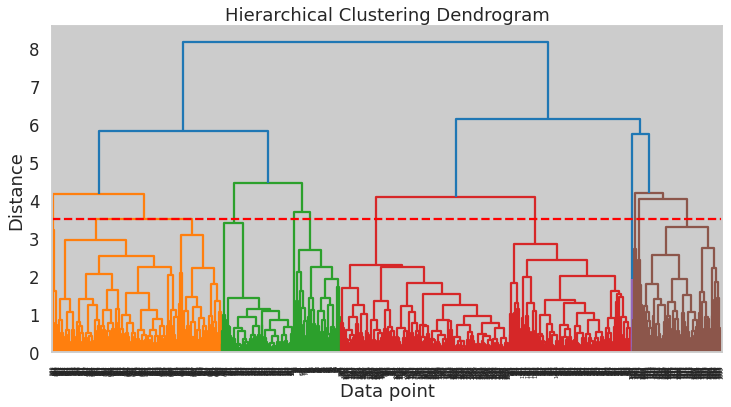

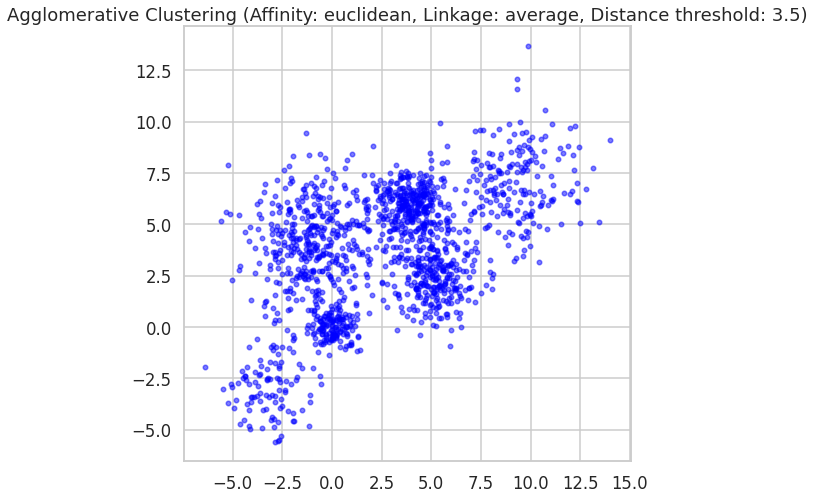

Best Silhouette score: 0.3708760639215861
Best Affinity: euclidean
Best Linkage: average
Best Distance threshold: 3.5


In [106]:
agglomerative_clustering(Multi_blob_Data)

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [107]:
def dbscan_cluster(X):
    eps_range = np.arange(1.5, 3)
    min_samples_range = np.arange(5, 25)
    best_score = -1
    best_params = None
    all_scores = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            if len(np.unique(labels)) > 1:
                score = silhouette_score(X, labels)
            else:
                score = -1
            all_scores.append([eps, min_samples, score])
            if score > best_score:
                best_score = score
                best_params = [eps, min_samples]
                
    all_scores = np.array(all_scores).reshape((len(eps_range), len(min_samples_range), 3))
    plt.imshow(all_scores[:, :, 2], cmap="viridis", extent=[5, 25, 1.5, 3], aspect="auto", origin="lower")
    plt.colorbar()
    plt.xlabel("Min Samples")
    plt.ylabel("Eps")
    plt.title("Silhouette Score vs Variation in Parameters")
    plt.show()
    dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
    labels = dbscan.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("DBSCAN Clustering with Best Parameters")
    plt.show()

    print("Best parameters:", "eps =", best_params[0], "min_samples =", best_params[1], "silhouette score =", best_score)

    return 

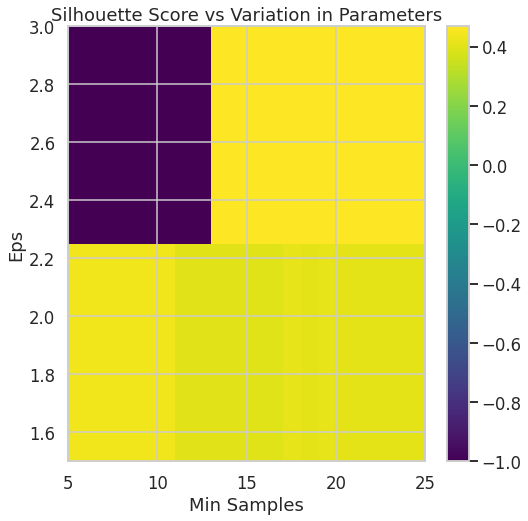

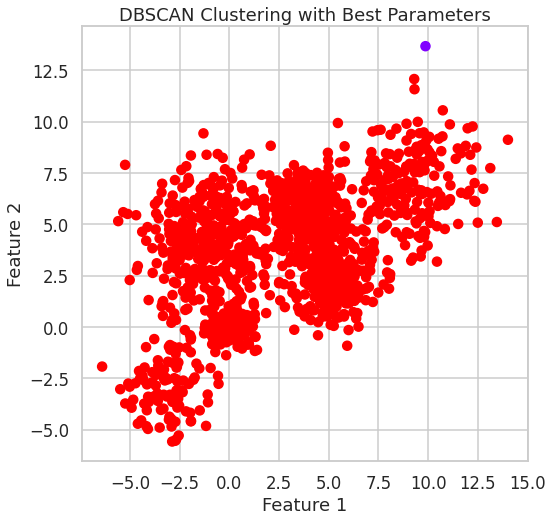

Best parameters: eps = 2.5 min_samples = 13 silhouette score = 0.4685207355522043


In [108]:
dbscan_cluster(Multi_blob_Data)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [109]:
def gaussian_cluster(X, n_components, covariance_type):

    # Initialize the GMM model
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    
    # Fit the model to the data
    gmm.fit(X)
    
    # Calculate the probability fit for each data point
    probs = gmm.predict_proba(X)

    # Generate a grid of points to evaluate the density at
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Evaluate the density at each point on the grid
    Z = -gmm.score_samples(grid)
    Z = Z.reshape(xx.shape)
    
    # Calculate the silhouette score
    labels = gmm.predict(X)
    score = silhouette_score(X, labels)

    # Plot the density contours and data points
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.title(f"GMM with {n_components} components and {covariance_type} covariance")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    #Print the first row of the probability matrix
    #print("proabability fit:\n", probs[:1])

    print(f"Silhouette Score = {score}")

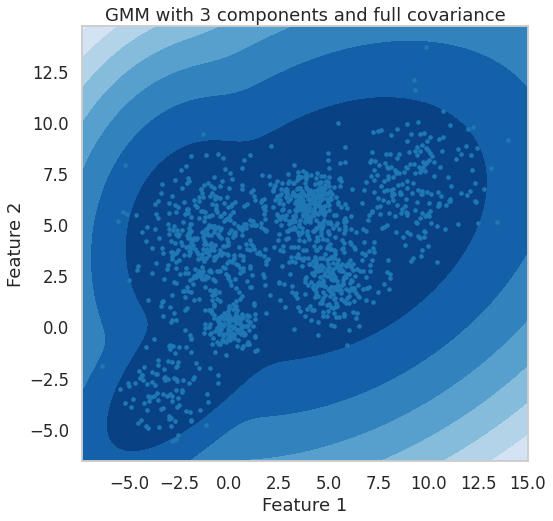

Silhouette Score = 0.4295540624579252


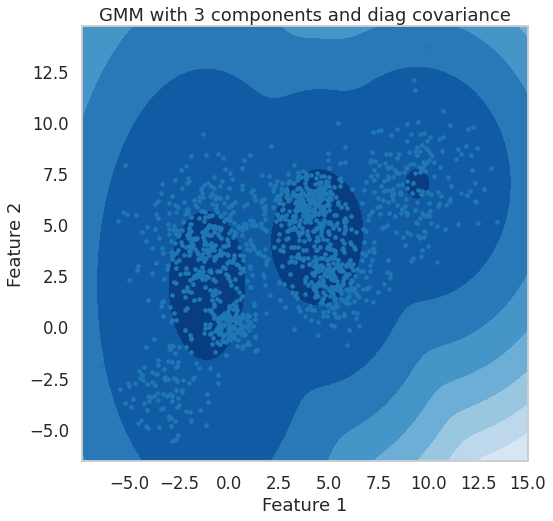

Silhouette Score = 0.4380395351075611


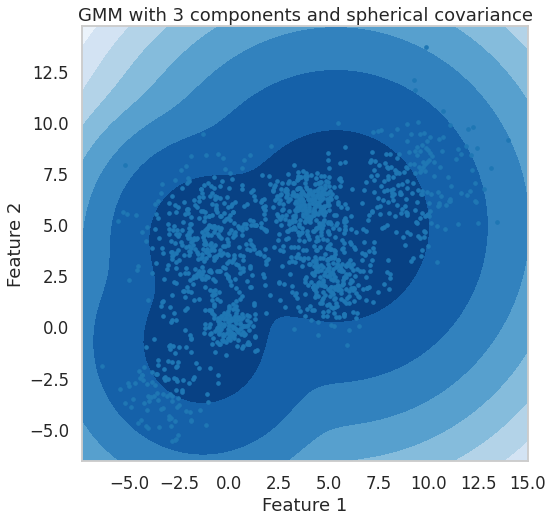

Silhouette Score = 0.4345808936545921


In [110]:
# Plot the data using a full covariance matrix
gaussian_cluster(Multi_blob_Data, 3, covariance_type='full')


# Plot the data using a diagonal covariance matrix
gaussian_cluster(Multi_blob_Data, 3, covariance_type='diag')


# Plot the data using a spherical covariance matrix
gaussian_cluster(Multi_blob_Data, 3, covariance_type='spherical')

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [111]:
iris_data = load_iris()

# normalize the data
scaler = StandardScaler()
Idata = scaler.fit_transform(iris_data.data)

# Perform PCA with two components
Ipca = PCA(n_components=2)
iris_pca = Ipca.fit_transform(Idata)

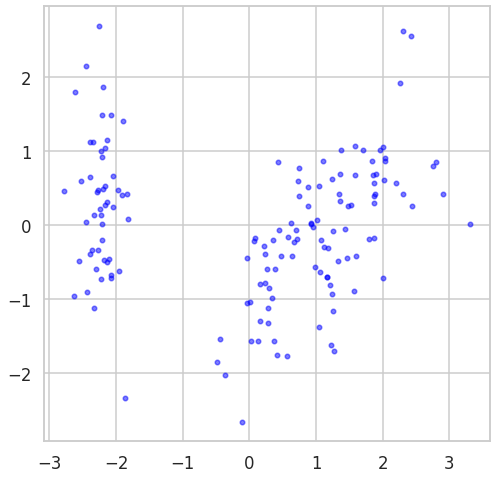

In [112]:
display_cluster(iris_pca)

### KMeans

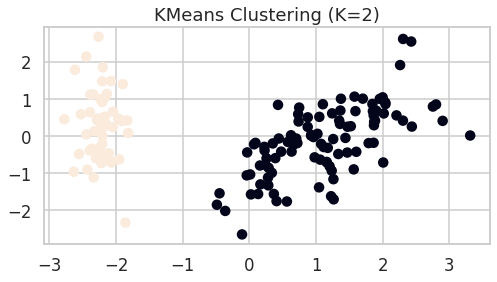

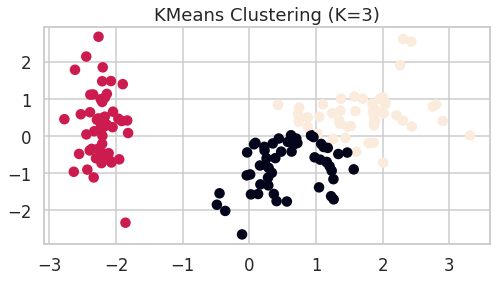

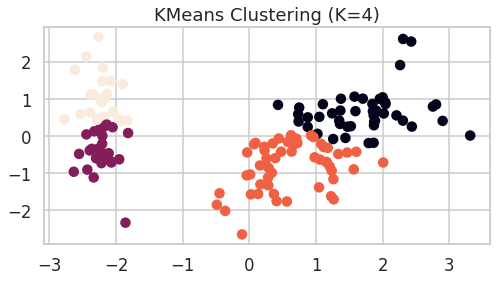

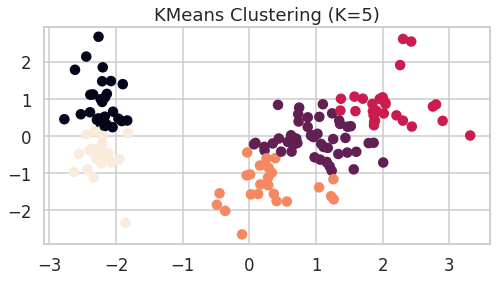

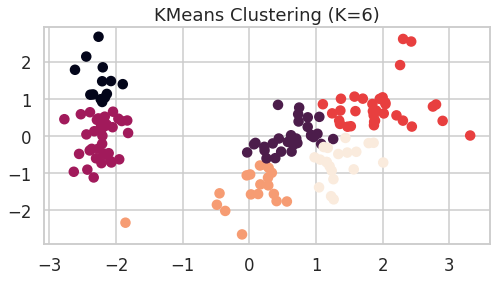

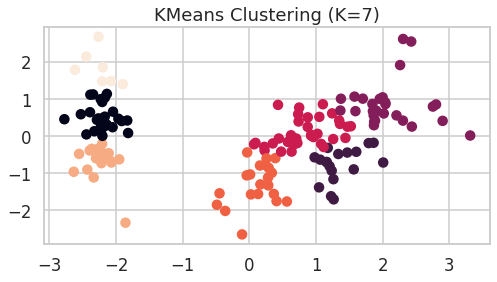

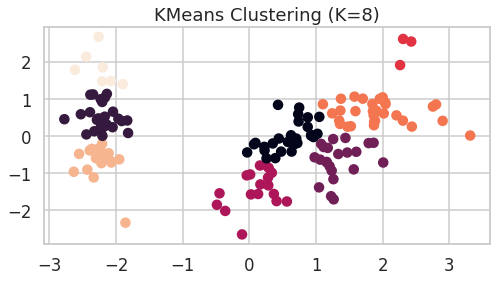

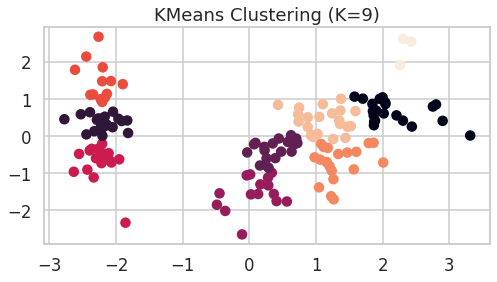

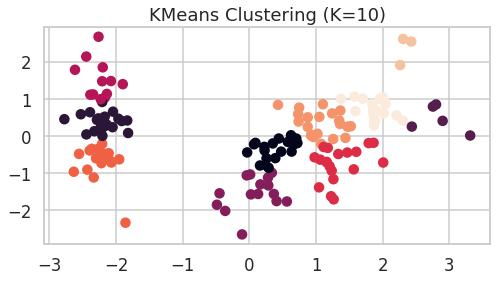

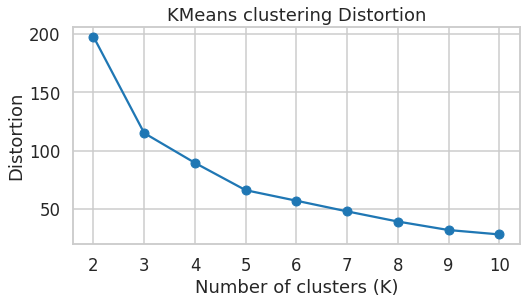

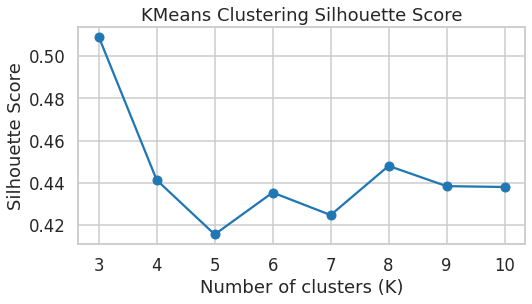

Best K based on Silhouette Score: 3


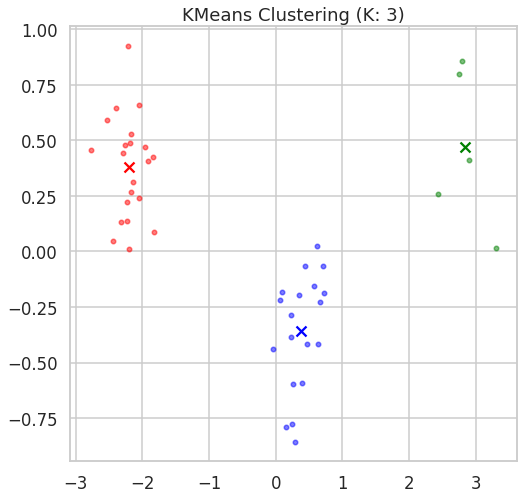

(3, 0.5091683341503112)

In [113]:
kmeans_clustering(iris_pca, 10)

### Hierarchal Clustering

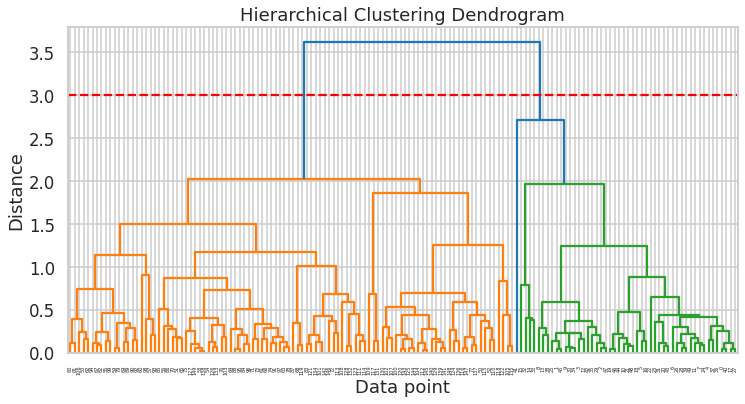

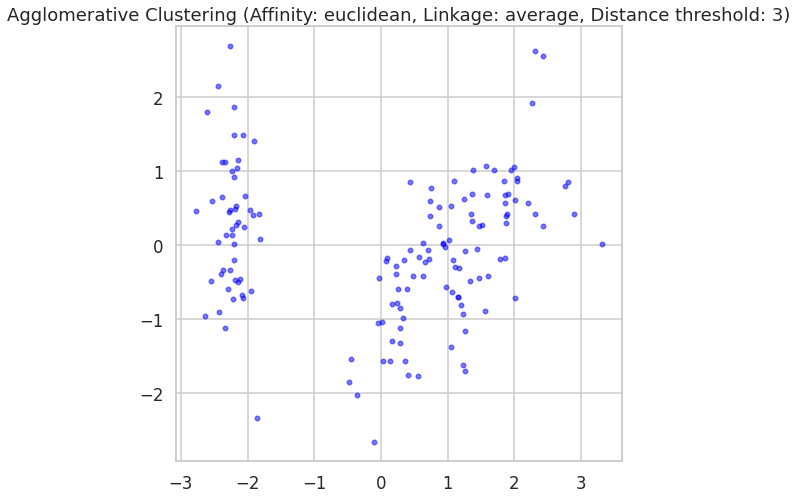

Best Silhouette score: 0.6145202036222636
Best Affinity: euclidean
Best Linkage: average
Best Distance threshold: 3


In [114]:
agglomerative_clustering(iris_pca)

### DBScan

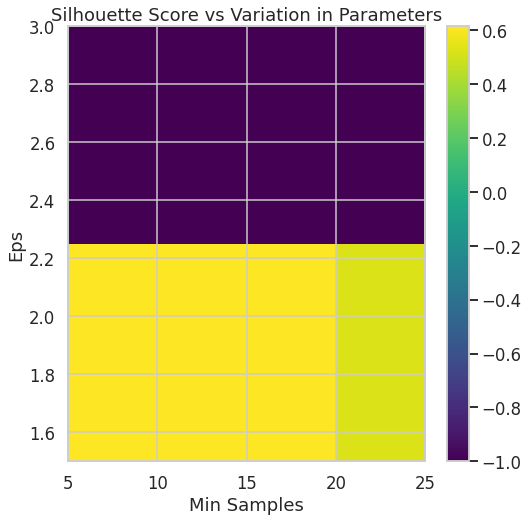

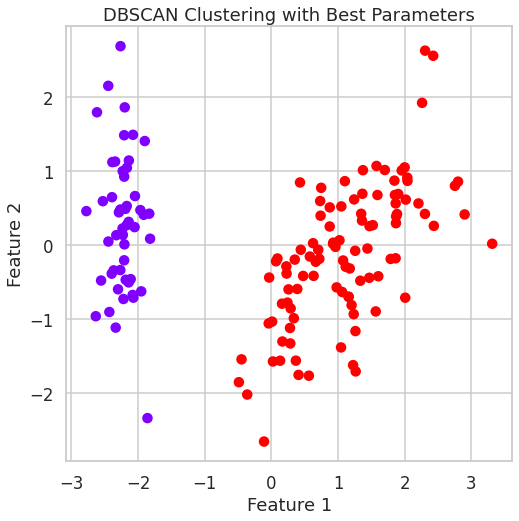

Best parameters: eps = 1.5 min_samples = 5 silhouette score = 0.6145202036222636


In [115]:
dbscan_cluster(iris_pca)

### Gaussian Mixture

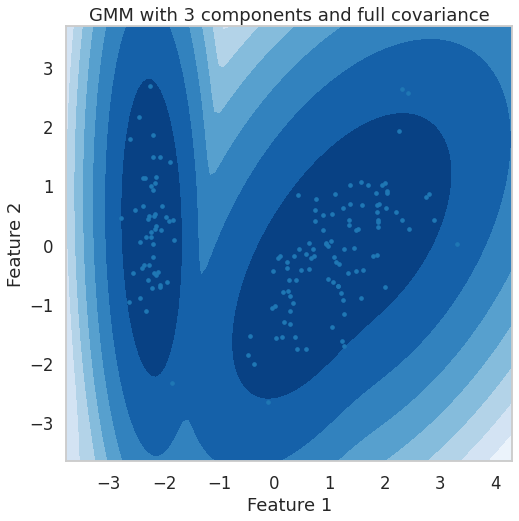

Silhouette Score = 0.48902970133362866


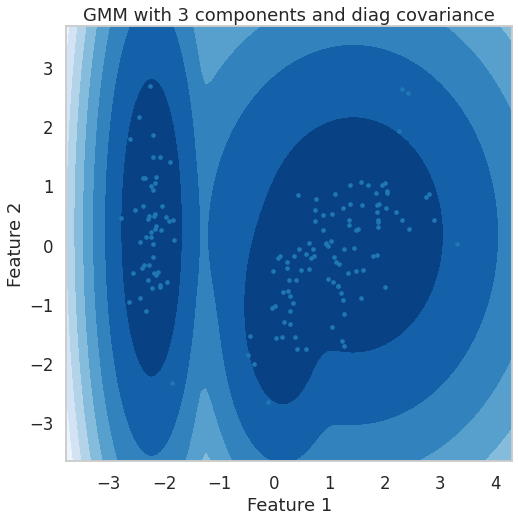

Silhouette Score = 0.46292012963295026


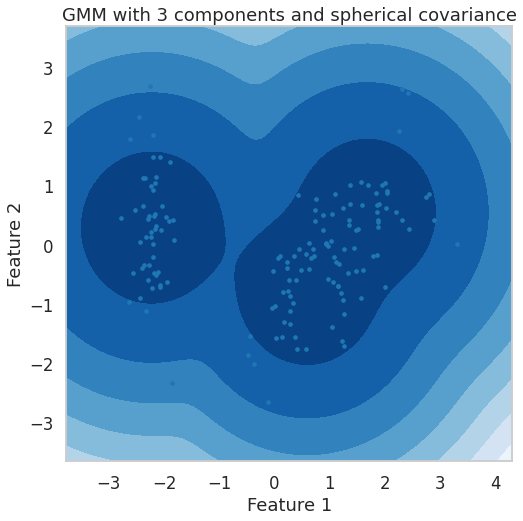

Silhouette Score = 0.5091683341503112


In [116]:
# Plot the data using a full covariance matrix
gaussian_cluster(iris_pca, 3, covariance_type='full')


# Plot the data using a diagonal covariance matrix
gaussian_cluster(iris_pca, 3, covariance_type='diag')


# Plot the data using a spherical covariance matrix
gaussian_cluster(iris_pca, 3, covariance_type='spherical')

## Customer dataset
Repeat all the above on the customer data set 

### Loading Dataset

In [117]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
customer_data = pd.read_csv('/content/drive/MyDrive/Clustering ML Project/Customer_data.csv')

customer_data.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [119]:
# Normalize the data
scaler = StandardScaler()
Cdata = scaler.fit_transform(customer_data)

# Perform PCA with two components
Cpca = PCA(n_components=2)
customer_pca = Cpca.fit_transform(Cdata)

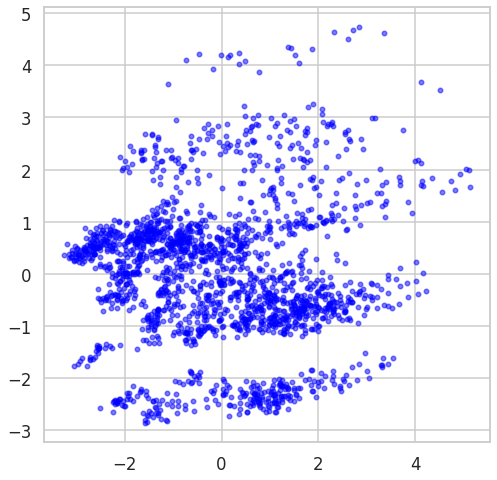

In [120]:
display_cluster(customer_pca)

### KMeans

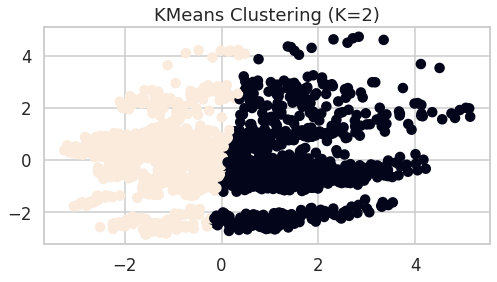

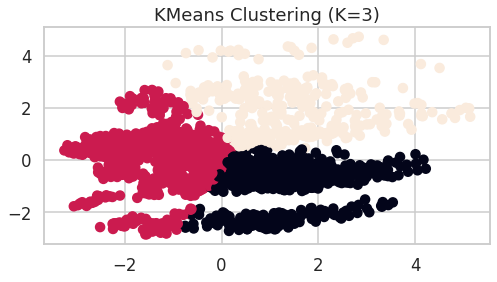

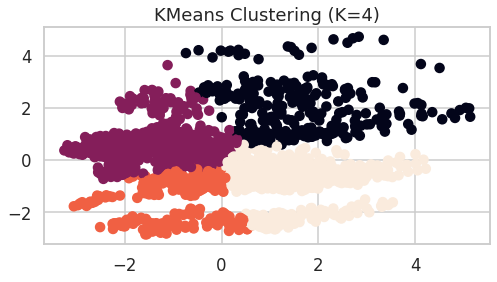

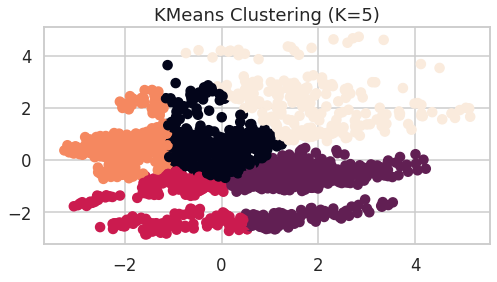

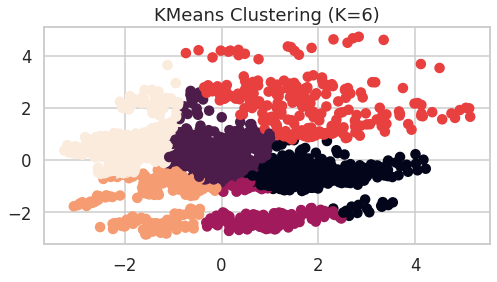

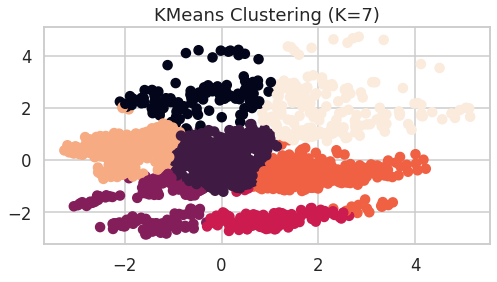

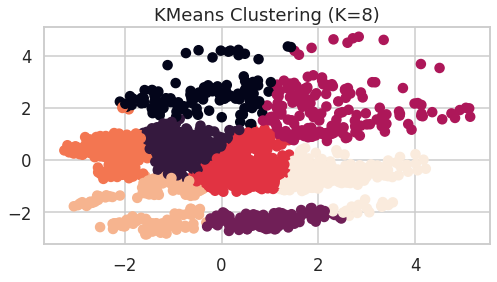

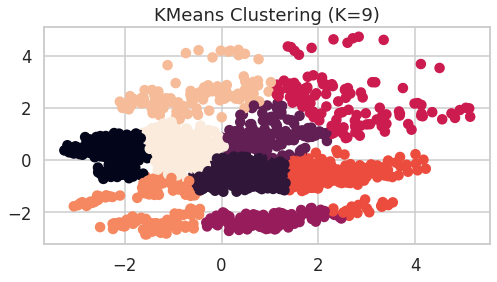

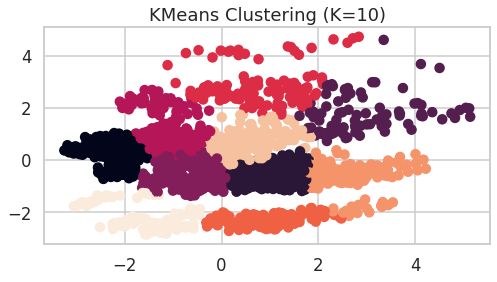

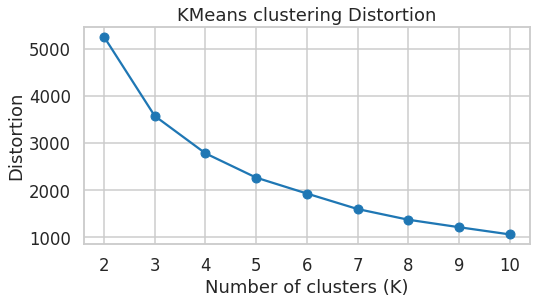

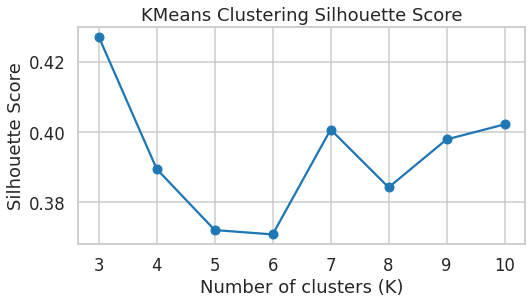

Best K based on Silhouette Score: 3


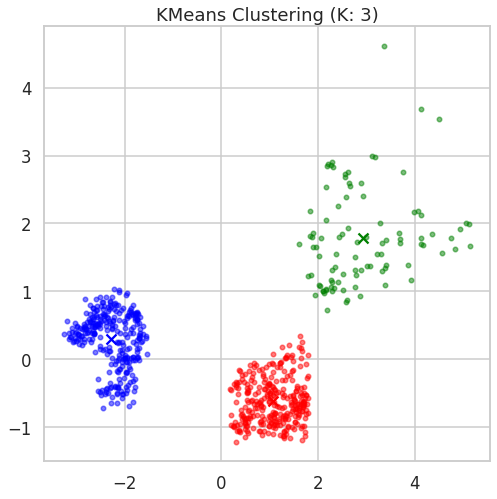

(3, 0.4271657855068134)

In [121]:
kmeans_clustering(customer_pca, 10)

### Hierarchal Clustering

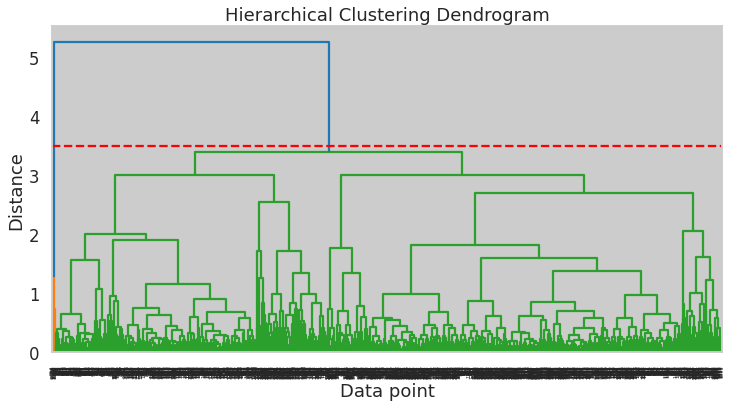

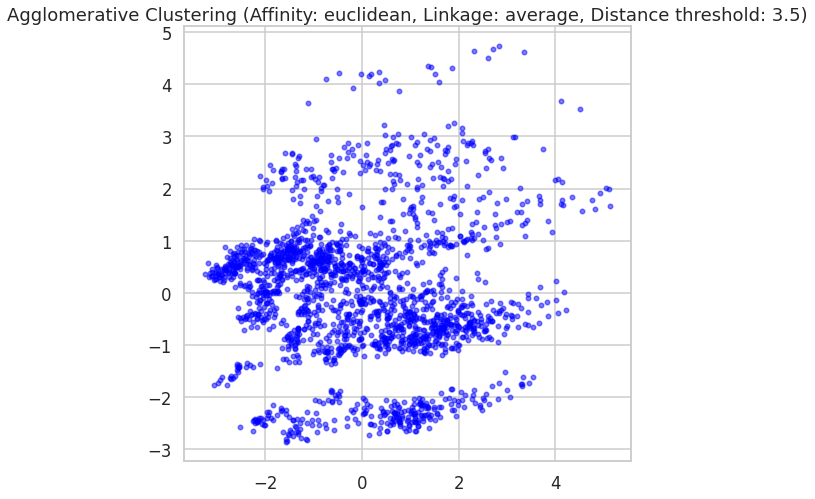

Best Silhouette score: 0.45802326656341397
Best Affinity: euclidean
Best Linkage: average
Best Distance threshold: 3.5


In [122]:
agglomerative_clustering(customer_pca)

### DBScan

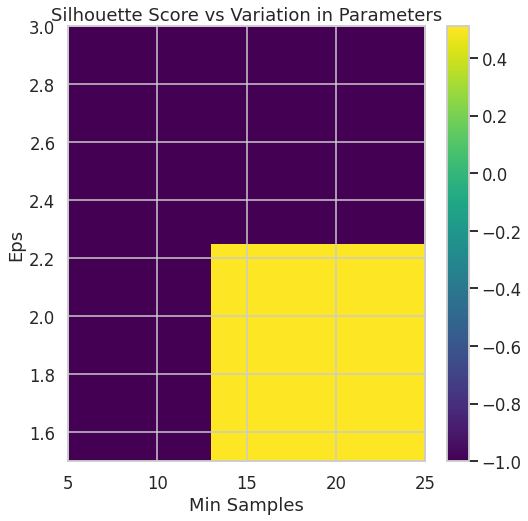

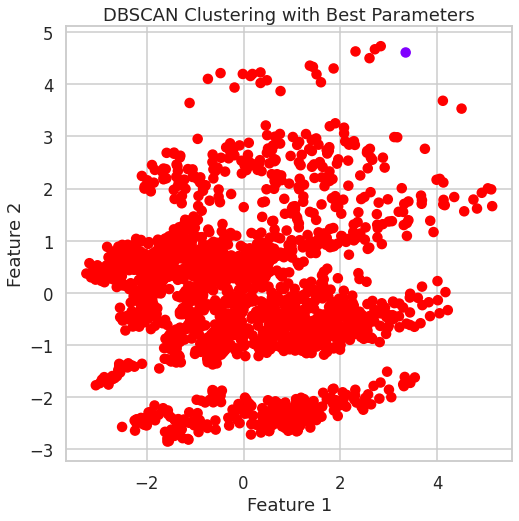

Best parameters: eps = 1.5 min_samples = 13 silhouette score = 0.5099021222508718


In [123]:
dbscan_cluster(customer_pca)

### Gaussian Mixture

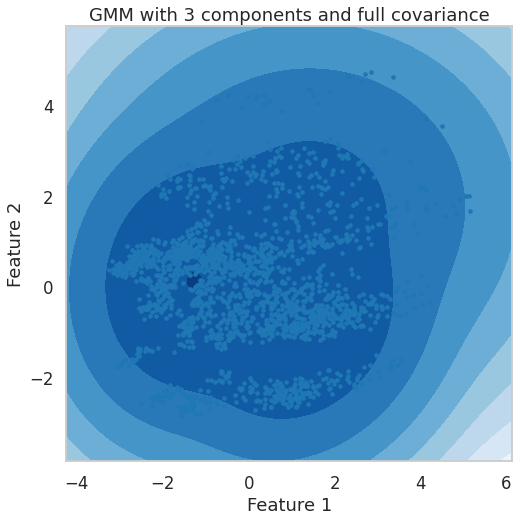

Silhouette Score = 0.42686421530149254


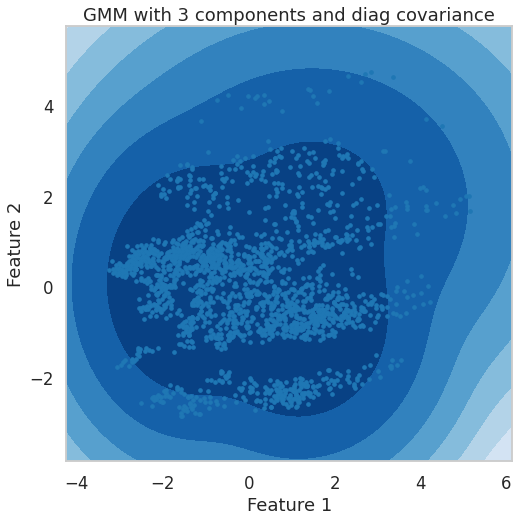

Silhouette Score = 0.42201344758648757


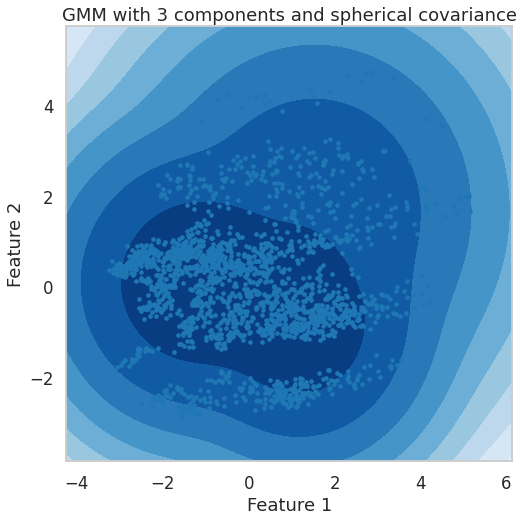

Silhouette Score = 0.4261137314457133


In [124]:
# Plot the data using a full covariance matrix
gaussian_cluster(customer_pca, 3, covariance_type='full')


# Plot the data using a diagonal covariance matrix
gaussian_cluster(customer_pca, 3, covariance_type='diag')


# Plot the data using a spherical covariance matrix
gaussian_cluster(customer_pca, 3, covariance_type='spherical')

# Observations & Comments

## KMeans

*The results for the KMeans clustering technique showed that,*
 
**1. For the Multiblob Dataset:**

*   Best K based on silhouette score = **6**
*   Best Silhouette Score = **0.4861**

**2. For the Iris Dataset:**

*   Best K based on silhouette score = **3**
*   Best Silhouette Score = **0.5092**

**3. For the Customer Dataset:**

*   Best K based on silhouette score = **3**
*   Best Silhouette Score = **0.4271**

## Hierarchal Clustering

*The results for the Hierarchal clustering technique showed that,*

**1. For the Multiblob Dataset:**

* Best Silhouette score: **0.3709**
* Best Affinity: **euclidean**
* Best Linkage: **average**
* Best Distance threshold: **3.5**

**2. For the Iris Dataset:**

* Best Silhouette score: **0.6145**
* Best Affinity: **euclidean**
* Best Linkage: **average**
* Best Distance threshold: **3**

**3. For the Customer Dataset:**
* Best Silhouette score: **0.4580**
* Best Affinity: **euclidean**
* Best Linkage: **average**
* Best Distance threshold: **3.5**

## DBScan

*The results for the DBScan clustering technique showed that,*

**1. For the Multiblob Dataset:**

* Best EPS = **2.5** 
* Best min_samples = **13** 
* Best Silhouette Score = **0.4685**

**2. For the Iris Dataset:**

* Best EPS = **1.5** 
* Best min_samples = **5** 
* Best Silhouette Score = **0.6145**

**3. For the Customer Dataset:**
* Best EPS = **1.5** 
* Best min_samples = **13** 
* Best Silhouette Score = **0.5099**

## Gaussian Mixture

*The results for the Gaussian Mixture clustering technique showed that,*

**1. For the Multiblob Dataset:**

* Covariance Type **"Full"** Silhouette Score = **0.4296**
* Covariance Type **"Diagonal"** Silhouette Score = **0.4380**
* Covariance Type **"Spherical"** Silhouette Score = **0.4372**
* Best Silhouette Score = **0.4372 **
* Best Covariance Type based on Silhouette Score = **Spherical**

**2. For the Iris Dataset:**

* Covariance Type **"Full"** Silhouette Score = **0.4927**
* Covariance Type **"Diagonal"** Silhouette Score = **0.4985**
* Covariance Type **"Spherical"** Silhouette Score = **0.5040**
* Best Silhouette Score = **0.5040 **
* Best Covariance Type based on Silhouette Score = **Spherical**

**3. For the Customer Dataset:**

* Covariance Type **"Full"** Silhouette Score = **0.4269**
* Covariance Type **"Diagonal"** Silhouette Score = **0.4228**
* Covariance Type **"Spherical"** Silhouette Score = **0.4261**
* Best Silhouette Score = **0.4269 **
* Best Covariance Type based on Silhouette Score = **Full**